In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)

In [2]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin1')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [3]:
df['Stage'].value_counts()

1    79
2    56
3    16
Name: Stage, dtype: int64

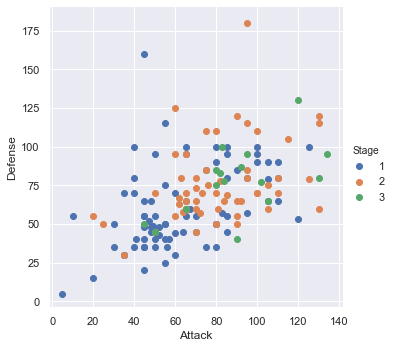

In [4]:
# scatter plot

# using FacetGrid

g = sns.FacetGrid(df, hue="Stage", size=5) \
   .map(plt.scatter, "Attack", "Defense") \
   .add_legend()


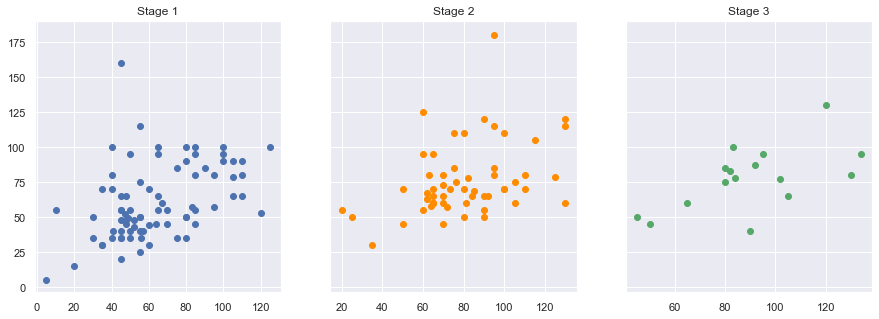

In [5]:

f, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))

ax[0].set_title("Stage 1")
ax[0].scatter(df.loc[df['Stage'] == 1, 'Attack'], df.loc[df['Stage'] == 1, 'Defense'], c="b")

ax[1].set_title("Stage 2")
ax[1].scatter(df.loc[df['Stage'] == 2, 'Attack'], df.loc[df['Stage'] == 2, 'Defense'], c="#FF8C00")

ax[2].set_title("Stage 3")
ax[2].scatter(df.loc[df['Stage'] == 3, 'Attack'], df.loc[df['Stage'] == 3, 'Defense'], c="g")
plt.show()

(0, 142.0200544906389)

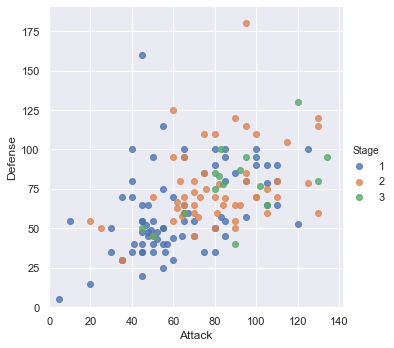

In [6]:
# Using lmplot

	
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

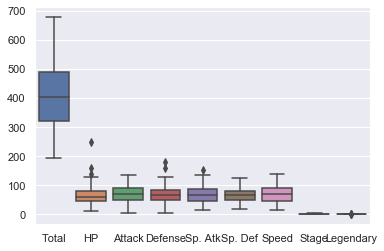

In [7]:
# Default boxplotPython
# Boxplot
g = sns.boxplot(data=df)

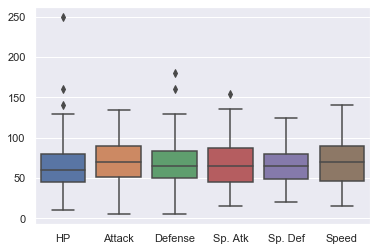

In [8]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
g = sns.boxplot(data=stats_df)

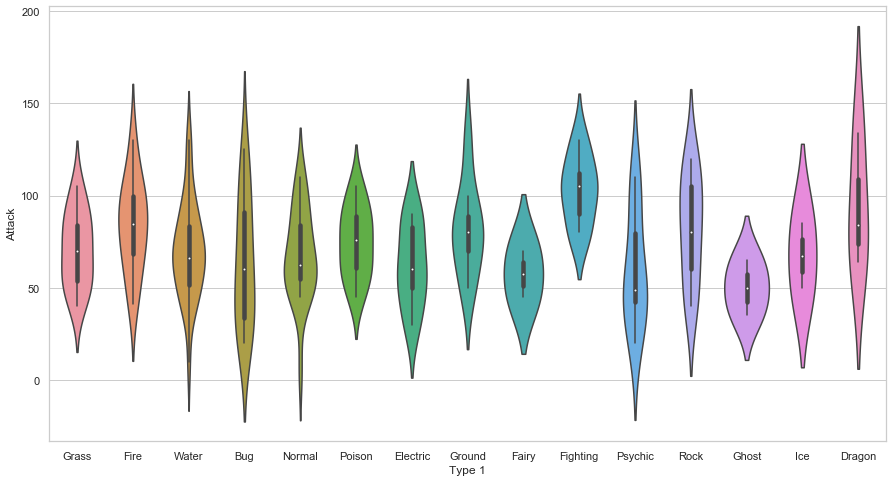

In [9]:
# Set theme
sns.set_style('whitegrid')

plt.figure(figsize=(15, 8))
# Violin plot

g = sns.violinplot(x='Type 1', y='Attack', data=df)

In [10]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

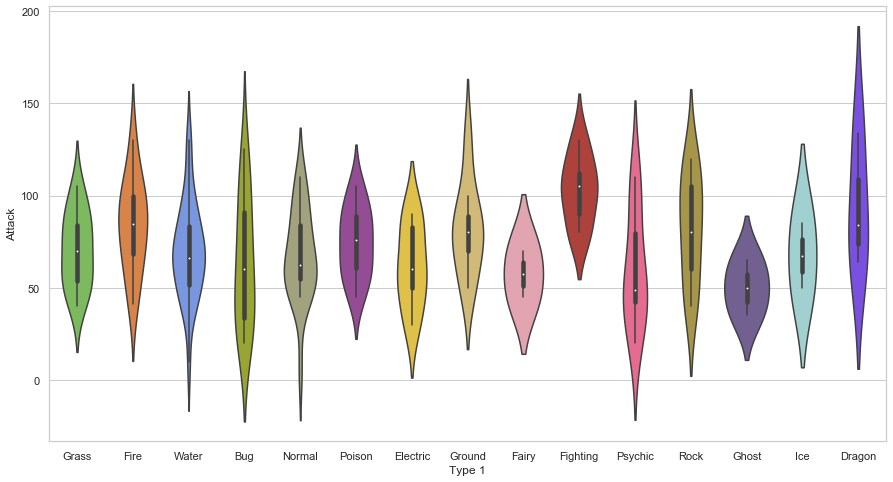

In [11]:
plt.figure(figsize=(15, 8))

# Violin plot with Pokemon color palette
g = sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

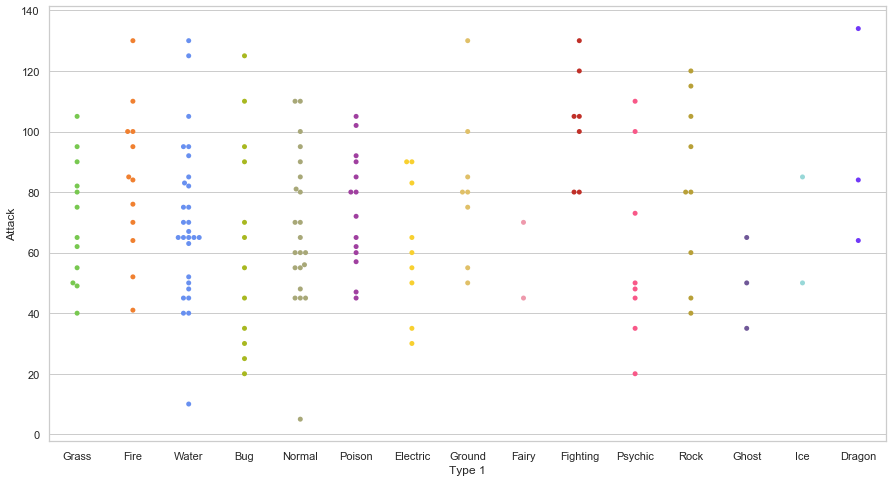

In [12]:
plt.figure(figsize=(15, 8))

g = sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

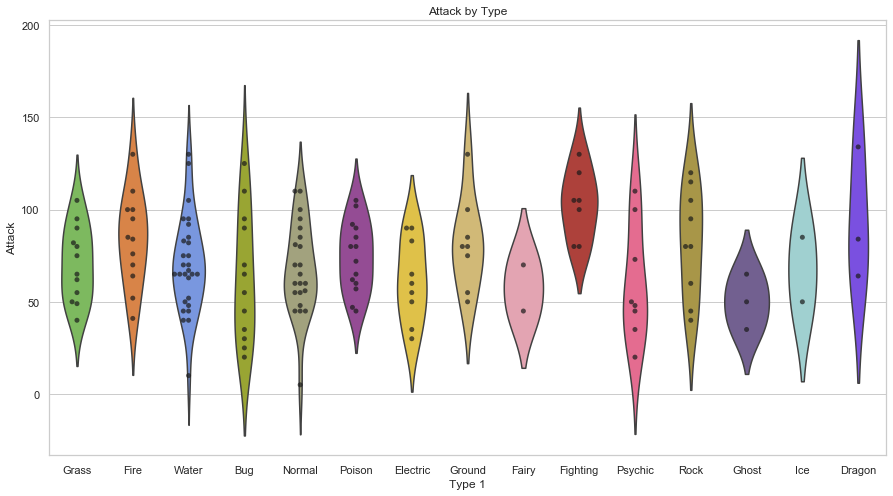

In [13]:
plt.figure(figsize=(15, 8))

# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')
plt.show()

In [14]:
# Putting it all together

stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [15]:
# https://www.journaldev.com/33398/pandas-melt-unmelt-pivot-function
# https://www.geeksforgeeks.org/python-read-blob-object-in-python-using-wand-library/?ref=rp

melted_df = pd.melt(stats_df,
id_vars=["Name", "Type 1", "Type 2"],
var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [16]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


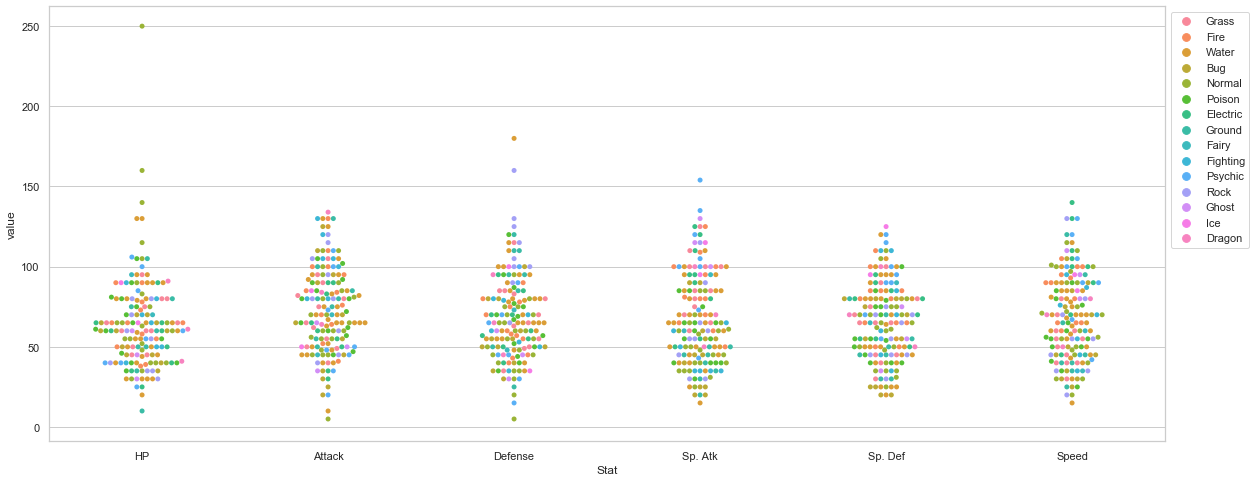

In [17]:
plt.figure(figsize=(20, 8))

# Swarmplot with melted_df

g = sns.swarmplot(x="Stat", y="value", hue="Type 1", data=melted_df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

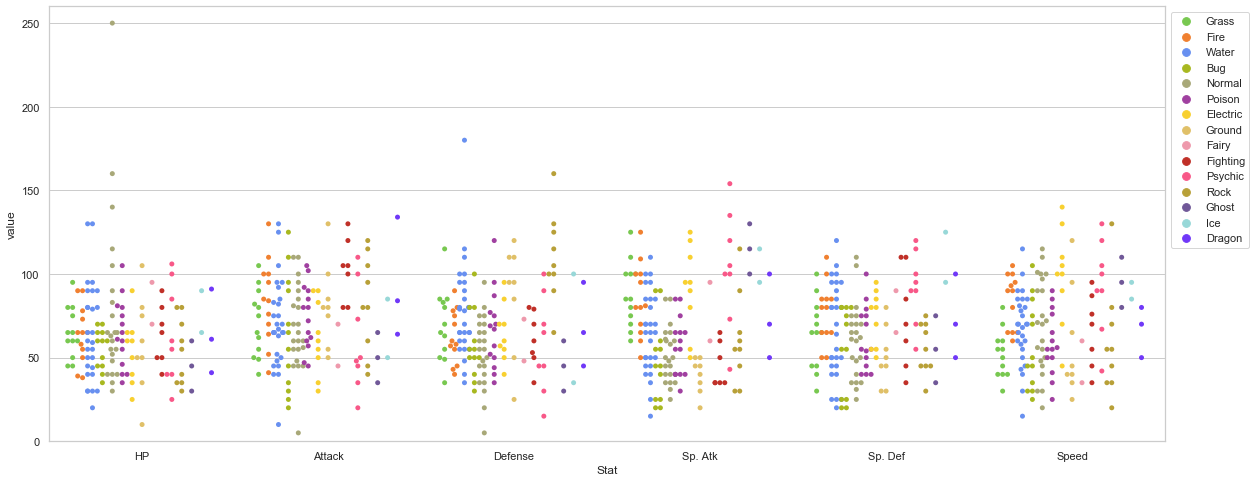

In [18]:
plt.figure(figsize=(20, 8))

sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

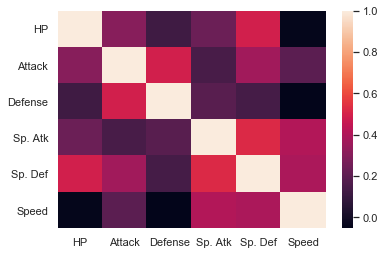

In [19]:
# Heatmaps

# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
g = sns.heatmap(corr)

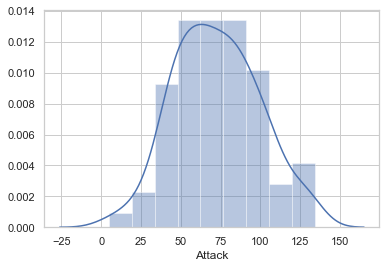

In [20]:
# Histogram

# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

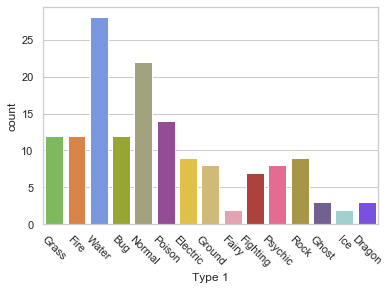

In [21]:
# bar plot

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

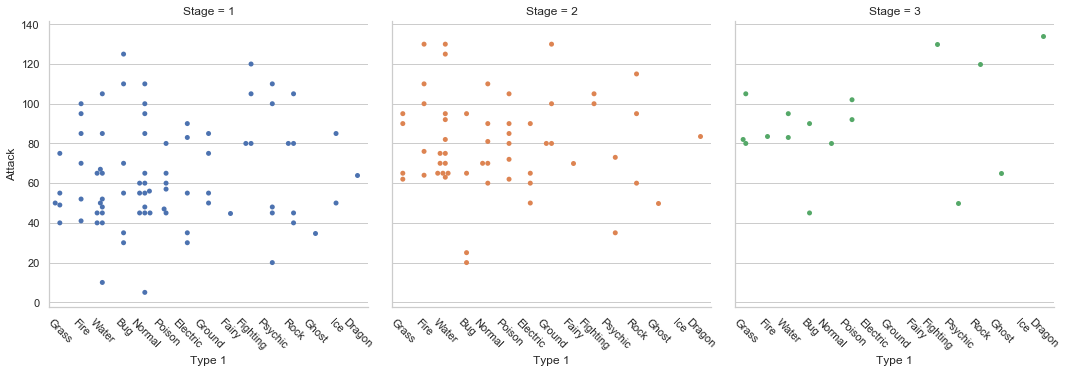

In [22]:
# Factor Plot - Factor plots make it easy to separate plots by categorical classes.

g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

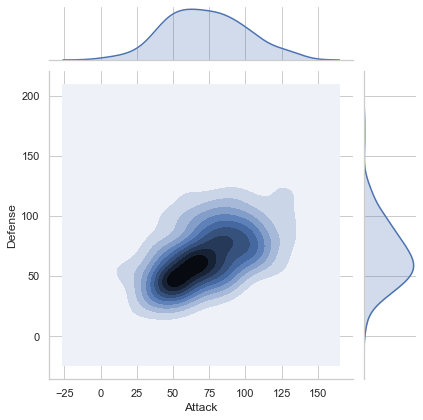

In [23]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', kind="kde", data=df)

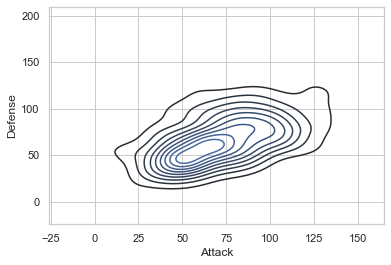

In [24]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)